In [1]:
from citipy import citipy
from config import api_key
import pandas as pd
import requests
import random
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


In [2]:
open_weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
open_weather_query_url = f"{open_weather_url}appid={api_key}&units={units}&q="
open_weather_query_url

'http://api.openweathermap.org/data/2.5/weather?appid=4ec4792f4e060d49665a8fd0591ca251&units=metric&q='

In [3]:
#city = citipy.nearest_city()
#print(city)
lat_list = []
for lat in range(2000):
    lat = random.randrange(-90,90)
    lat_list.append(lat)

lng_list = []
for lng in range(2000):
    lng = random.randrange(-180,180)
    lng_list.append(lng)

lng_dec_list = []
for lng_d in range(2000):
    lng_d = random.random()
    lng_dec_list.append(lng_d)

lat_dec_list = []
for lat_d in range(2000):
    lat_d = random.random()
    lat_dec_list.append(lat_d)


In [4]:
#city = citipy.nearest_city()
lat=pd.DataFrame({"lat":lat_list,'lat_dec':lat_dec_list})

lat = lat['lat'] + lat['lat_dec']

lng=pd.DataFrame({"lng":lng_list,'lng_dec':lng_dec_list})

lng = lng['lng'] + lng['lng_dec']
lng

0       -71.525018
1      -176.036244
2       115.974151
3        79.992288
4        61.031534
           ...    
1995   -151.143279
1996     96.639500
1997    149.665728
1998    150.071902
1999   -176.149985
Length: 2000, dtype: float64

In [5]:

lat_lng = zip(lat,lng)
lat_lng

In [6]:
cities = []

for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)



In [7]:
cities_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lon", "Max Temp", "Wind Speed"])

In [8]:
len(cities)

765

In [9]:

records = 1

print("Starting Data Retrieval")
print("------------------------")

for city in cities:
    
    try:
        response = requests.get(open_weather_query_url + city).json()
        data = {
            "City": response['name'],
            "Cloudiness": response['clouds']['all'],
            "Country": response['sys']['country'],
            "Date": response['dt'], "Humidity": response['main']['humidity'],
            "Lat": response['coord']['lat'],
            "Lon": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Wind Speed": response['wind']['speed']
        }
               
        cities_df = cities_df.append(data, ignore_index = True)

        print(f"Processing Record {records} | {city}") 
        
        records += 1

    except (KeyError, IndexError):
        print(f"{city} not found ")
print("-----------------------")
print("Data Retrieval Complete")

Starting Data Retrieval
------------------------
Processing Record 1 | longavi
Processing Record 2 | provideniya
Processing Record 3 | albany
Processing Record 4 | dikson
taolanaro not found 
Processing Record 5 | georgetown
Processing Record 6 | kodiak
Processing Record 7 | hobart
barentsburg not found 
Processing Record 8 | vaini
Processing Record 9 | saldanha
Processing Record 10 | lebu
Processing Record 11 | ushuaia
Processing Record 12 | kingsland
Processing Record 13 | kamina
Processing Record 14 | norman wells
Processing Record 15 | port alfred
Processing Record 16 | ugoofaaru
Processing Record 17 | buala
Processing Record 18 | karaton
Processing Record 19 | saint-augustin
Processing Record 20 | barrow
Processing Record 21 | camapua
Processing Record 22 | thanh hoa
Processing Record 23 | esperance
Processing Record 24 | hithadhoo
Processing Record 25 | rikitea
Processing Record 26 | bredasdorp
Processing Record 27 | kapaa
tatsinskaya not found 
Processing Record 28 | asau
Proces

In [10]:
output_data_file = "cities_data.csv"
cities_df.to_csv(output_data_file)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Longaví,81,CL,1601721057,81,-35.97,-71.68,4.99,1.57
1,Provideniya,90,RU,1601721058,83,64.38,-173.30,5.30,5.36
2,Albany,80,US,1601721027,86,42.60,-73.97,7.22,1.33
3,Dikson,100,RU,1601721059,88,73.51,80.55,1.26,10.65
4,George Town,20,MY,1601720818,70,5.41,100.34,30.00,3.60


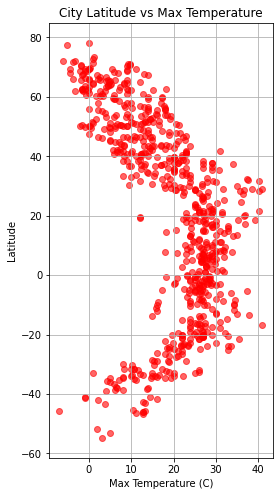

the graph above is showing that the closer to the equator the temperture does increase


In [11]:




plt.figure(figsize=(4,8))
plt.scatter(cities_df["Max Temp"], cities_df["Lat"], color='r', alpha=0.6)
plt.grid()
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")
plt.savefig('latitude_vs_temp.png')
plt.show()
print("the graph above is showing that the closer to the equator the temperture does increase")

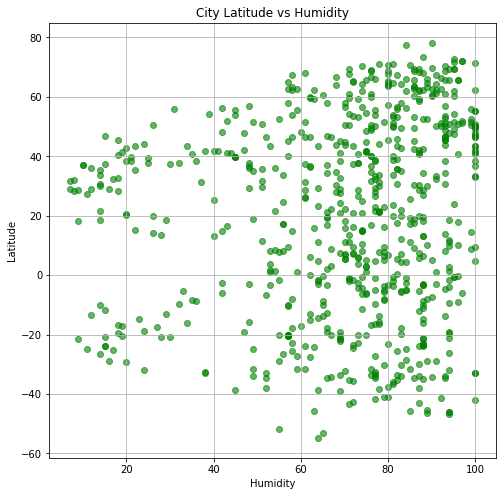

The above graph shows that the humidity doesn't increase closer to the equator


In [12]:

plt.figure(figsize=(8,8))
plt.scatter(cities_df["Humidity"], cities_df["Lat"], color='g', alpha=0.6)
plt.grid()
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.title("City Latitude vs Humidity")
plt.savefig('latitude_vs_humidity.png')
plt.show()
print("The above graph shows that the humidity doesn't increase closer to the equator")

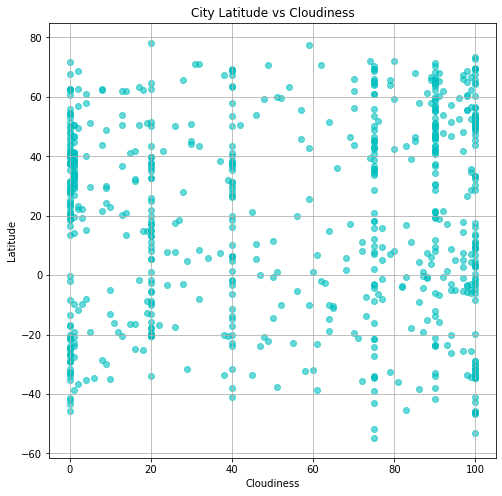

The above graph shows that the cloudiness doesn't increase closer to the equator


In [13]:
plt.figure(figsize=(8,8))
plt.scatter(cities_df["Cloudiness"], cities_df["Lat"], color='c', alpha=0.6)
plt.grid()
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.savefig('latitude_vs_Cloudiness.png')
plt.show()
print("The above graph shows that the cloudiness doesn't increase closer to the equator")

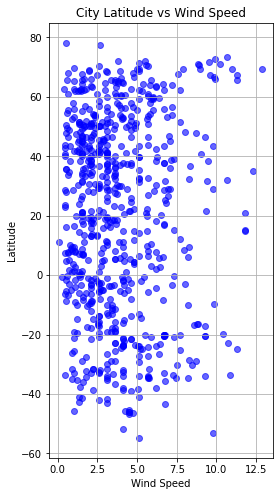

The above graph shows that the wind speed doesn't increase closer to the equator


In [14]:
plt.figure(figsize=(4,8))
plt.scatter(cities_df["Wind Speed"], cities_df["Lat"], color='b', alpha=0.6)
plt.grid()
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.savefig('latitude_vs_Wind_Speed.png')
plt.show()
print("The above graph shows that the wind speed doesn't increase closer to the equator")

In [15]:
cities_NH_df = cities_df.loc[cities_df["Lat"] > 0.00, :]
cities_SH_df = cities_df.loc[cities_df["Lat"] < 0.00, :]
latNH = cities_NH_df['Lat'].astype(float)
tempNH = cities_NH_df['Max Temp'].astype(float)
humidityNH = cities_NH_df['Humidity'].astype(float)
cloudsNH = cities_NH_df['Cloudiness'].astype(float)
windNH = cities_NH_df['Wind Speed'].astype(float)
latSH = cities_SH_df['Lat'].astype(float)
tempSH = cities_SH_df['Max Temp'].astype(float)
humiditySH = cities_SH_df['Humidity'].astype(float)
cloudsSH = cities_SH_df['Cloudiness'].astype(float)
windSH = cities_SH_df['Wind Speed'].astype(float)

Max Temp vs Latitude

The r-squared is: -0.8119722703470794


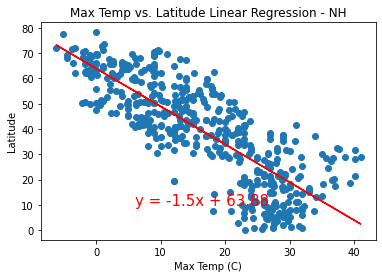

In [16]:
(slopeNHT, interceptNHT, rvalueNHT, pvalueNHT, stderrNHT) = st.linregress(tempNH, latNH)

regress_valuesNHT = tempNH * slopeNHT + interceptNHT

line_eqNHT = f"y = {round(slopeNHT, 2)}x + {round(interceptNHT, 2)}"

plt.scatter(tempNH, latNH)
plt.plot(tempNH, regress_valuesNHT, "r-")
plt.annotate(line_eqNHT, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Max Temp (C)')
plt.title('Max Temp vs. Latitude Linear Regression - NH')
print(f"The r-squared is: {rvalueNHT}")
plt.savefig('northern_temp_regression.png')
plt.show()

The r-squared is: 0.7238348375128575


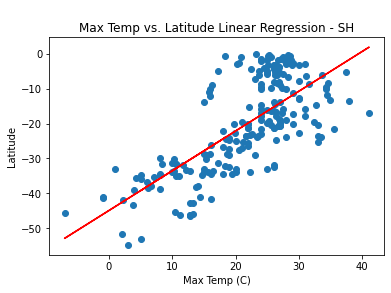

In [17]:
(slopeSHT, interceptSHT, rvalueSHT, pvalueSHT, stderrSHT) = st.linregress(tempSH, latSH)

regress_valuesSHT = tempSH * slopeSHT + interceptSHT

line_eqSHT = f"y = {round(slopeSHT, 2)}x + {round(interceptSHT, 2)}"

plt.scatter(tempSH, latSH)
plt.plot(tempSH, regress_valuesSHT, "r-")
plt.annotate(line_eqSHT, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Max Temp (C)')
plt.title('Max Temp vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalueSHT}")
plt.savefig('Southern_temp_regression.png')
plt.show()


the above graphs confirm there is a temperature increase the closer you get to the equator

Humidity vs. Latitude Linear Regression

The r-squared is: 0.1870861491882498


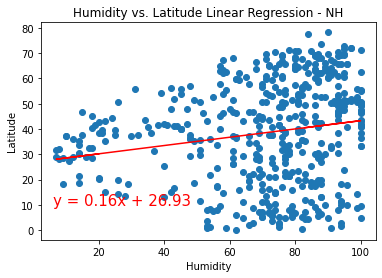

In [18]:
(slopeNHH, interceptNHH, rvalueNHH, pvalueNHH, stderrNHH) = st.linregress(humidityNH, latNH)

regress_valuesNHH = humidityNH * slopeNHH + interceptNHH

line_eqNHH = f"y = {round(slopeNHH, 2)}x + {round(interceptNHH, 2)}"

plt.scatter(humidityNH, latNH)
plt.plot(humidityNH, regress_valuesNHH, "r-")
plt.annotate(line_eqNHH, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression - NH')
print(f"The r-squared is: {rvalueNHH}")
plt.savefig('Northern_humidity_regression.png')
plt.show()

The r-squared is: -0.026842387463511433


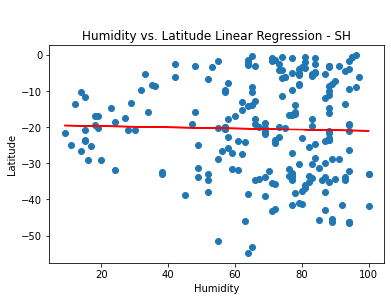

In [19]:
(slopeSHH, interceptSHH, rvalueSHH, pvalueSHH, stderrSHH) = st.linregress(humiditySH, latSH)

regress_valuesSHH = humiditySH * slopeSHH + interceptSHH

line_eqSHH = f"y = {round(slopeSHH, 2)}x + {round(interceptSHH, 2)}"

plt.scatter(humiditySH, latSH)
plt.plot(humiditySH, regress_valuesSHH, "r-")
plt.annotate(line_eqSHH, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalueSHH}")
plt.savefig('Southern_humidity_regression.png')
plt.show()


the above graphs confirm there is no corrolation between humidity and the equator

Cloudiness vs. Latitude Linear Regression

The r-squared is: 0.09653179346992091


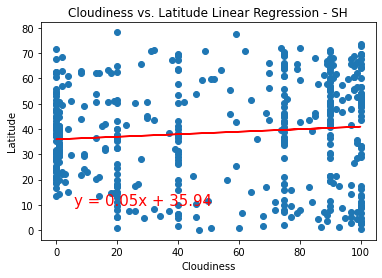

In [20]:
(slopeNHC, interceptNHC, rvalueNHC, pvalueNHC, stderrNHC) = st.linregress(cloudsNH, latNH)

regress_valuesNHC = cloudsNH * slopeNHC + interceptNHC

line_eqNHC = f"y = {round(slopeNHC, 2)}x + {round(interceptNHC, 2)}"

plt.scatter(cloudsNH, latNH)
plt.plot(cloudsNH, regress_valuesNHC, "r-")
plt.annotate(line_eqNHC, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalueNHC}")
plt.savefig('Northern_Cloudiness_regression.png')
plt.show()

The r-squared is: 0.010960154301347997


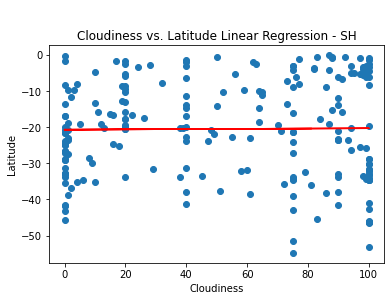

In [21]:
(slopeSHC, interceptSHC, rvalueSHC, pvalueSHC, stderrSHC) = st.linregress(cloudsSH, latSH)

regress_valuesSHC = cloudsSH * slopeSHC + interceptSHC

line_eqSHC = f"y = {round(slopeSHC, 2)}x + {round(interceptSHC, 2)}"

plt.scatter(cloudsSH, latSH)
plt.plot(cloudsSH, regress_valuesSHC, "r-")
plt.annotate(line_eqSHC, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalueSHC}")
plt.savefig('Southern_Cloudiness_regression.png')
plt.show()


the above graphs confirm there is no corrolation between cloudiness and the equator

Wind Speed vs. Latitude Linear Regression

The r-squared is: 0.13714217740921797


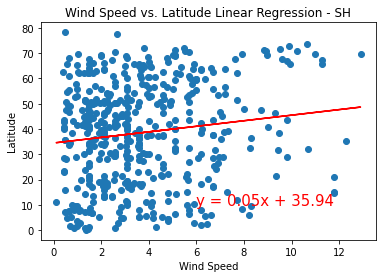

In [22]:
(slopeNHW, interceptNHW, rvalueNHW, pvalueNHW, stderrNHW) = st.linregress(windNH, latNH)

regress_valuesNHW = windNH * slopeNHW + interceptNHW

line_eqNHW = f"y = {round(slopeNHW, 2)}x + {round(interceptNHW, 2)}"

plt.scatter(windNH, latNH)
plt.plot(windNH, regress_valuesNHW, "r-")
plt.annotate(line_eqNHC, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalueNHW}")
plt.savefig('Northern_windspeed_regression.png')
plt.show()

The r-squared is: -0.19703755527389102


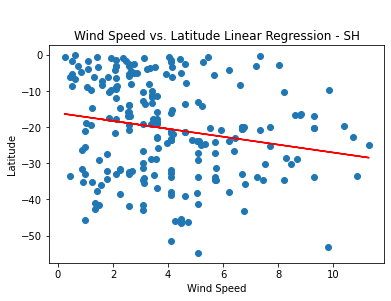

In [23]:
(slopeSHW, interceptSHW, rvalueSHW, pvalueSHW, stderrSHW) = st.linregress(windSH, latSH)

regress_valuesSHW = windSH * slopeSHW + interceptSHW

line_eqSHW = f"y = {round(slopeSHW, 2)}x + {round(interceptSHW, 2)}"

plt.scatter(windSH, latSH)
plt.plot(windSH, regress_valuesSHW, "r-")
plt.annotate(line_eqSHC, (6,10), fontsize=15, color="red")
plt.ylabel('Latitude')
plt.xlabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalueSHW}")
plt.savefig('Northern_windspeed_regression.png')
plt.show()

the above graphs confirm there is no corrolation between wind speed and the equator